In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import ot_helpers

# Data Loading

In [2]:
# load the images
I1 = np.load('data/I1.npy')
I2 = np.load('data/I2.npy')

# turn the images into ordianry distributions
p1 = I1.flatten()/I1.sum()
p2 = I2.flatten()/I2.sum()

# cost function
C = ot_helpers.build_distance()

# 3.3 Computing the Barycenter

In [3]:
def interpolate_images(C, p1, p2, nu1, nu2, verbose = True):
    # Define the parameters
    d = C.shape[0]
    c = cp.Variable(d)
    M_1 = cp.Variable((d,d))
    M_2 = cp.Variable((d,d))

    # Set the constraints
    constraints = [ M_1 >= 0, M_2 >= 0, c >= 0 ]
    for i in range(d):
        constraints.append(cp.sum(M_1[i,:]) == p1[i])
        constraints.append(cp.sum(M_2[i,:]) == p2[i])
    for j in range(d):
        constraints.append(cp.sum(M_1[:,j]) == c[j])
        constraints.append(cp.sum(M_2[:,j]) == c[j])
    constraints.append(cp.sum(c) == 1)

    # Set the objective
    objective = cp.Minimize(nu1 * cp.sum(cp.multiply(M_1, C)) + nu2 * cp.sum(cp.multiply(M_2, C)))

    # Define the problem
    problem = cp.Problem(objective, constraints)

    # Solve the problem
    problem.solve(verbose = verbose, solver=cp.MOSEK)

    return c.value

# Visualizing the Results

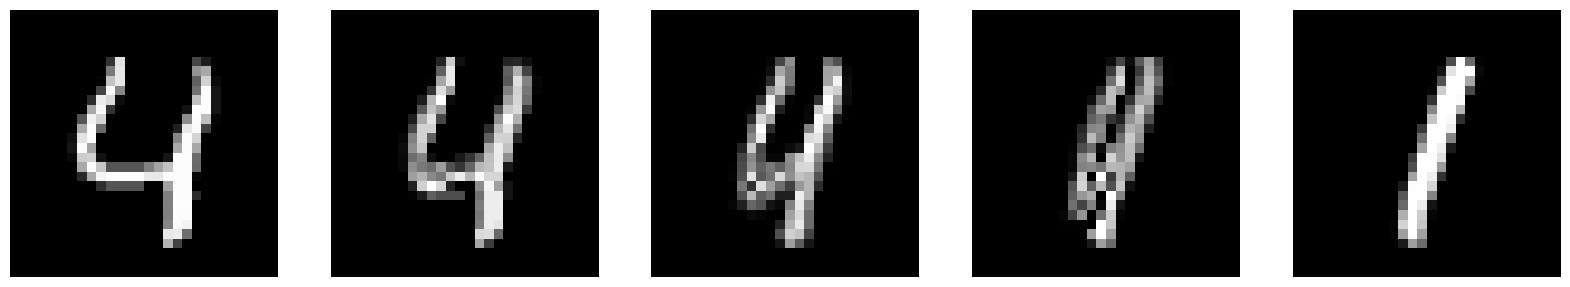

In [4]:
plt.figure(figsize=(20,5))
lambda2s = np.linspace(0,1,5)
for i in range(5):
    res = interpolate_images(C, p1, p2, 1-lambda2s[i], lambda2s[i], verbose = False)
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(res.squeeze(), (28,28)), cmap='gray')
    plt.axis('off')

# Try the same code with the images below for a happy surprise

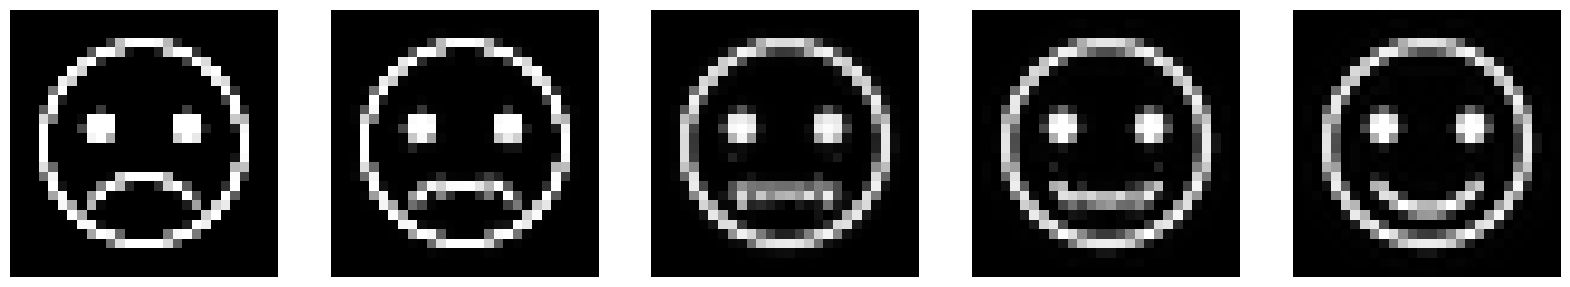

In [5]:
I1 = np.load('data/sad.npy')
I2 = np.load('data/happy.npy')
p1 = I1.flatten()/I1.sum()
p2 = I2.flatten()/I2.sum()

plt.figure(figsize=(20,5))
lambda2s = np.linspace(0,1,5)
for i in range(5):
    res = interpolate_images(C, p1, p2, 1-lambda2s[i], lambda2s[i], verbose = False)
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(res.squeeze(), (28,28)), cmap='gray')
    plt.axis('off')